## Importando base de dados

In [10]:
import pandas as pd
base_treino = pd.read_csv('https://raw.githubusercontent.com/Matheusisac/lia1-2023-2/main/Matheus%20Isac%20-%20Entregas/Tenis/Train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/Matheusisac/lia1-2023-2/main/Matheus%20Isac%20-%20Entregas/Tenis/Test.csv')

In [11]:
base_treino

,Tempo,Temperatura,Humidade,Vento,Jogar Tenis
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderada,Alta,Fraco,Sim
4,Chuvoso,Agradável,Normal,Fraco,Sim
5,Chuvoso,Agradável,Normal,Forte,Não
6,Ensolarado,Moderada,Alta,Fraco,Não
7,Ensolarado,Agradável,Normal,Fraco,Sim
8,Chuvoso,Moderada,Normal,Fraco,Sim
9,Ensolarado,Moderada,Normal,Forte,Sim


## Pré-Processamento

In [12]:
y_treino = base_treino.iloc[:,4].values

In [13]:
y_treino

array(['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Não'], dtype=object)

In [14]:
X_treino = base_treino.iloc[:,0:4].values

In [21]:
X_test = X_test.iloc[:,0:4].values

In [15]:
X_treino

array([['Ensolarado', 'Quente', 'Alta', 'Fraco'],
       ['Ensolarado', 'Quente', 'Alta', 'Forte'],
       ['Nublado', 'Quente', 'Alta', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Fraco'],
       ['Chuvoso', 'Agradável', 'Normal', 'Fraco'],
       ['Chuvoso', 'Agradável', 'Normal', 'Forte'],
       ['Ensolarado', 'Moderada', 'Alta', 'Fraco'],
       ['Ensolarado', 'Agradável', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Normal', 'Fraco'],
       ['Ensolarado', 'Moderada', 'Normal', 'Forte'],
       ['Nublado', 'Moderada', 'Alta', 'Fraco'],
       ['Nublado', 'Quente', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Forte']], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Tempo = LabelEncoder()
label_encoder_Temperatura = LabelEncoder()
label_encoder_Humidade = LabelEncoder()
label_encoder_Vento = LabelEncoder()

In [22]:
X_treino[:,0] = label_encoder_Tempo.fit_transform(X_treino[:,0])
X_treino[:,1] = label_encoder_Temperatura.fit_transform(X_treino[:,1])
X_treino[:,2] = label_encoder_Humidade.fit_transform(X_treino[:,2])
X_treino[:,3] = label_encoder_Vento.fit_transform(X_treino[:,3])

X_test[:,0] = label_encoder_Tempo.fit_transform(X_test[:,0])
X_test[:,1] = label_encoder_Temperatura.fit_transform(X_test[:,1])
X_test[:,2] = label_encoder_Humidade.fit_transform(X_test[:,2])
X_test[:,3] = label_encoder_Vento.fit_transform(X_test[:,3])

In [23]:
X_treino

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [24]:
X_test

array([[1, 1, 1, 0],
       [0, 0, 1, 1],
       [2, 2, 1, 0],
       [2, 0, 0, 0]], dtype=object)

## Treinamento

In [26]:
import pickle
with open("tenis.pkl", 'wb') as f:
  pickle.dump((X_treino, y_treino), f)

In [27]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [28]:
with open('/content/tenis.pkl', 'rb') as f:
  X_treino, y_treino = pickle.load(f)

In [29]:
X_treino

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [30]:
y_treino

array(['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Não'], dtype=object)

In [31]:
arvore = dtc()
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [32]:
arvore.feature_importances_

array([0.5525    , 0.        , 0.19680556, 0.25069444])

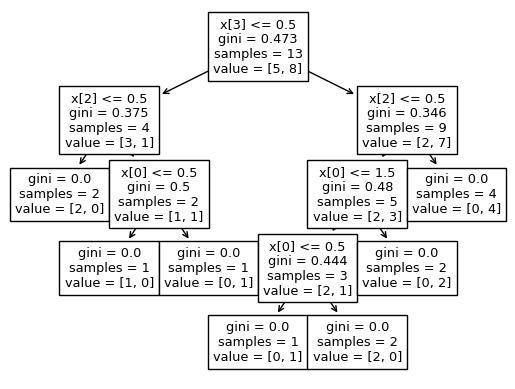

In [33]:
from sklearn import tree
tree.plot_tree(arvore);

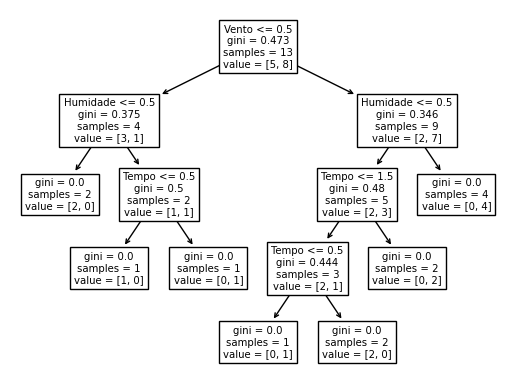

In [34]:
prev = ['Tempo', 'Temperatura', 'Humidade', 'Vento']
tree.plot_tree(arvore, feature_names=prev);

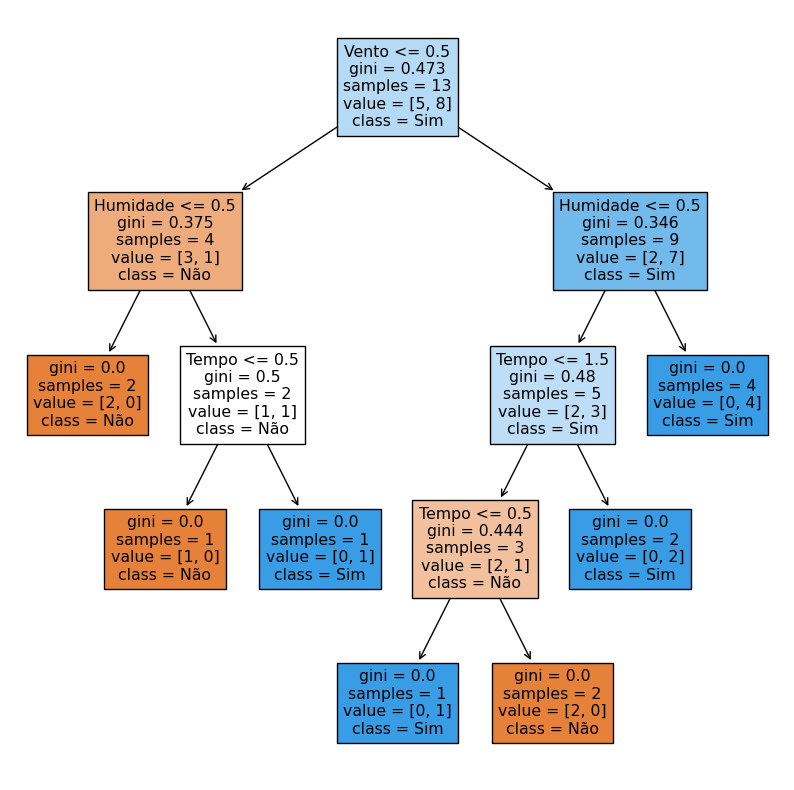

In [35]:
import matplotlib.pyplot as plt
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore, feature_names=prev, class_names = arvore.classes_, filled=True);

In [38]:
p = arvore.predict(X_test)
p

array(['Sim', 'Sim', 'Sim', 'Não'], dtype=object)

### Alternativa randomica

Apenas pela curiosidade

In [39]:
from sklearn.ensemble import RandomForestClassifier as nfc
modelo = nfc(n_estimators = 100, n_jobs=-1, random_state = 0)
modelo.fit(X_treino,y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [41]:
p = modelo.predict(X_test)
p

array(['Sim', 'Sim', 'Sim', 'Não'], dtype=object)